<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/hiep/hiep_3122410110_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bạn đã bao giờ tự hỏi những yếu tố nào đóng vai trò quan trọng trong việc dự đoán nguy cơ mắc bệnh tiểu đường type 2? Liệu số lần mang thai, chỉ số BMI hay tiền sử gia đình có ảnh hưởng mạnh mẽ nhất? Và điều gì sẽ xảy ra nếu chúng ta muốn dự đoán khả năng mắc bệnh của một cá nhân trong vòng 5 năm tới?**

### **Bộ dữ liệu Pima Indians Diabetes có thể giúp bạn khám phá những câu hỏi đó!**
### **Tập dữ liệu này được thu thập từ cộng đồng người Pima ở Arizona (Mỹ), vốn có tỷ lệ mắc bệnh tiểu đường type 2 cao. Nó bao gồm các thông tin y tế như số lần mang thai, nồng độ glucose trong máu, huyết áp, độ dày da, nồng độ insulin, chỉ số BMI, yếu tố di truyền tiểu đường (Diabetes Pedigree Function) và tuổi. Nhãn mục tiêu cho biết liệu bệnh nhân có phát triển bệnh tiểu đường type 2 trong vòng 5 năm hay không.**

### **Với dữ liệu này, bạn có thể khám phá và phân tích để tìm ra những yếu tố nguy cơ then chốt, so sánh ảnh hưởng của các biến số, và xây dựng các mô hình dự báo (ví dụ logistic regression, random forest, neural networks) để hỗ trợ chẩn đoán sớm và phòng ngừa bệnh tiểu đường.**

In [2]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [3]:
# Import thư viện google colab để kết nối với google drive (link đã đưa vào nhóm, nhớ truy cập)
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Định nghĩa tên các cột dữ liệu dựa trên file .names để dễ đọc
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

**Ý nghĩa từng cột dữ liệu**
- Pregnancies: số lần mang thai
- Glucose: nồng độ glucose trong máu sau khi nhịn ăn 2 giờ
- BloodPressure: huyết áp tâm thu (mm Hg)
- SkinThickness: độ dày da ở vùng tam giác vai (mm)
- Insulin: nồng độ insulin trong máu sau khi nhịn ăn (mu U/ml)
- BMI: chỉ số khối cơ thể (kg/m^2)
- DiabetesPedigreeFunction: hàm di truyền bệnh tiểu đường
- Age: tuổi (năm)
- Outcome: kết quả chẩn đoán (1: có tiểu đường, 0: không có tiểu đường)

In [5]:
# đọc dữ liệu từ file csv trong link google drive
diabetes_df = pd.read_csv("/content/drive/MyDrive/PTDL 25-26/pima-indians-diabetes.data.csv", names=column_names)           # Reading the data file

In [6]:
# Hiển thị 5 dòng đầu tiên của dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Hiển thị thông tin tổng quan về dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Tổng quan về DataFrame:**
- Bao gồm: số lượng dòng, số lượng cột, tên cột, kiểu dữ liệu của từng cột, và số lượng giá trị không null trong mỗi cột.
- RangeIndex: có 768 dòng, đánh số từ 0 đến.
- Data columns (total 9 columns): có 9 cột dữ liệu.
- dtypes: int64(8), float64(1): có 8 cột kiểu int64 và 1 cột kiểu float64
- memory usage: 54.1 KB: bộ nhớ sử dụng để lưu trữ dataframe

In [8]:
# Hiển thị các thống kê mô tả cơ bản của dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hiển thị các thống kê mô tả cơ bản của dataframe**
- Các thống kê mô tả cơ bản bao gồm số lượng giá trị không null, trung bình, độ lệch chuẩn, giá trị min, các phần trăm vị trí (25%, 50%, 75%), và giá trị max cho mỗi cột số
- count: số lượng giá trị không null trong mỗi cột
- mean: giá trị trung bình của mỗi cột
- std: độ lệch chuẩn của mỗi cột
- min: giá trị nhỏ nhất trong mỗi cột
- 25%: giá trị tại vị trí phần trăm thứ 25 trong mỗi cột
- 50%: giá trị tại vị trí phần trăm thứ 50 (trung vị) trong mỗi cột
- 75%: giá trị tại vị trí phần trăm thứ 75 trong mỗi cột
- max: giá trị lớn nhất trong mỗi cột  
**=> Các thống kê này giúp hiểu rõ hơn về phân phối và phạm vi của dữ liệu trong mỗi cột**

Chúng ta thấy rằng tập dữ liệu có 9 cột và 768 hàng. Tất cả các cột đều có đủ 768 giá trị không rỗng, cho thấy không có giá trị thiếu (null values) rõ ràng trong tập dữ liệu.

In [9]:
# Tạo một bản sao của dataframe để tránh thay đổi dữ liệu gốc
df1 = diabetes_df.copy()

Trước hết, chúng ta sẽ cố gắng hiểu ý nghĩa của tất cả các cột trong khung dữ liệu.
Để làm được điều này, chúng ta sẽ xem xét các giá trị duy nhất đạt được bởi mỗi cột mà chúng ta không thể hiểu được ý nghĩa của chúng.

In [10]:
# Kiểm tra các giá trị duy nhất trong cột 'Pregnancies'
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [11]:
# Kiểm tra các giá trị duy nhất trong cột 'Glucose'
df1['Glucose'].unique() #cột này có giá trị 0

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [12]:
# Kiểm tra các giá trị duy nhất trong cột 'BloodPressure'
df1['BloodPressure'].unique() # cột này có giá trị 0

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [13]:
# Kiểm tra các giá trị duy nhất trong cột 'SkinThickness'
df1['SkinThickness'].unique() #cột này có giá trị 0

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'Insulin'
df1['Insulin'].unique() #cột này có giá trị 0

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [15]:
# Kiểm tra các giá trị duy nhất trong cột 'BMI'
df1['BMI'].unique() # có giá tri 0

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [16]:
# Kiểm tra các giá trị duy nhất trong cột 'DiabetesPedigreeFunction'
df1['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [17]:
# Kiểm tra các giá trị duy nhất trong cột 'Age'
df1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [18]:
# Kiểm tra các giá trị duy nhất trong cột 'Outcome'
df1['Outcome'].unique()

array([1, 0])

#**Clean data**

Làm sạch dữ liệu là một bước quan trọng trước khi Phân tích Khám phá Dữ liệu (EDA) vì nó sẽ loại bỏ các dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả của EDA.

Trong quá trình làm sạch dữ liệu, chúng ta sẽ thực hiện các bước sau:

+ Loại bỏ các hàng trùng lặp.

+ Xử lý các giá trị bị thiếu.

+ Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.

+ Thêm các cột quan trọng (nếu cần).

## **Bước 1: Loại bỏ trùng lặp**

In [19]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Kết quả: (0, 9): 0 dòng, 9 cột  
=> Bảng dữ liệu không có dữ liệu trùng lặp

In [20]:
# Hiển thị kích thước của dataframe
df1.shape

(768, 9)

Bảng dữ liệu có 768 hàng và 9 cột

## **Bước 2: Xử lý các giá trị bị thiếu**

In [21]:
# Cột có giá trị thiếu
df1.isnull().sum().sort_values(ascending = False)[:6]

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Không có giá trị thiếu trong các cột dữ liệu

Tuy nhiên. Vì các cột dữ liệu "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" có dữ liệu '0' được xem là dữ liệu thiếu (vì các giá trị này không thể bằng 0) nên chúng ta sẽ thay thế chúng bằng giá trị trung vị để tránh ảnh hưởng bởi các giá trị ngoại lai

- Giá trị trung vị (median) là giá trị ở giữa khi các giá trị được sắp xếp theo thứ tự  
Ví dụ: trong cột 'Glucose', nếu có các giá trị [0, 85, 90, 95, 100], giá trị trung vị là 90
- Giá trị ngoại lai (outliers) là các giá trị nằm xa so với phần lớn các giá trị khác trong tập dữ liệu  
Ví dụ: trong cột 'Insulin', nếu có các giá trị [0, 15, 20, 25, 300], giá trị 300 là một giá trị ngoại lai vì nó nằm xa so với các giá trị khác
- Việc sử dụng giá trị trung vị giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai này khi thay thế các giá trị 0, giúp duy trì tính toàn vẹn của dữ liệu, tránh việc làm sai lệch các phân tích sau này

In [22]:
# Danh sách các cột có giá trị 0 cần xử lý
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Duyệt qua từng cột và thay thế giá trị 0 bằng giá trị trung vị
for column in columns_to_process:
    # Lấy giá trị trung vị của cột, bỏ qua các giá trị 0
    median_value = df1[df1[column] != 0][column].median()

    # Thay thế các giá trị 0 bằng giá trị trung vị
    df1[column] = df1[column].replace(0, median_value)

In [23]:
# Kiểm tra lại các cột để đảm bảo không còn giá trị 0
print(df1[columns_to_process].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Hàng "min" của các cột dữ liệu "Glucose" "BloodPressure" "SkinThickness" "Insulin" "BMI" đều có giá trị >0. Vì vậy các cột này đã được xử lý các dữ liệu thiếu

## **Bước 3: Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.**

Sau khi kiểm tra cấu trúc dữ liệu, các kiểu dữ liệu của từng cột đã được xác định là phù hợp với nội dung của chúng (số nguyên cho các biến đếm và số thực cho các chỉ số). Do đó, không cần thực hiện bất kỳ thay đổi nào đối với kiểu dữ liệu. Bước này xác nhận rằng dữ liệu đã sẵn sàng cho quá trình phân tích tiếp theo.

## **Bước 4: Thêm các cột quan trọng.**

In [24]:
import pandas as pd

# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df

# Tạo cột phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Gầy'
    elif 18.5 <= bmi < 24.9:
        return 'Bình thường'
    elif 24.9 <= bmi < 29.9:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(classify_bmi)

# Tạo cột phân loại Glucose
def classify_glucose(glucose):
    if glucose < 110:
        return 'Bình thường'
    elif 110 <= glucose < 126:
        return 'Tiền tiểu đường'
    else:
        return 'Tiểu đường'

df1['Glucose_Category'] = df1['Glucose'].apply(classify_glucose)


# Tạo một hàm đơn giản để phân loại chỉ số DiabetesPedigreeFunction
def classify_pedigree(score):
    if score >= 0.5:
        return 'Nguy cơ cao'
    else:
        return 'Nguy cơ thấp'

# Áp dụng hàm để tạo cột mới 'Family_History'
df1['Family_History'] = df1['DiabetesPedigreeFunction'].apply(classify_pedigree)

In [25]:
# Hiển thị 5 dòng đầu tiên của dataframe
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Category,Family_History
0,6,148,72,35,125,33.6,0.627,50,1,Béo phì,Tiểu đường,Nguy cơ cao
1,1,85,66,29,125,26.6,0.351,31,0,Thừa cân,Bình thường,Nguy cơ thấp
2,8,183,64,29,125,23.3,0.672,32,1,Bình thường,Tiểu đường,Nguy cơ cao
3,1,89,66,23,94,28.1,0.167,21,0,Thừa cân,Bình thường,Nguy cơ thấp
4,0,137,40,35,168,43.1,2.288,33,1,Béo phì,Tiểu đường,Nguy cơ cao


Việc thêm các cột phân loại như BMI_Category, Glucose_Category và Family_History giúp chúng ta chuyển đổi dữ liệu thô thành các nhóm có ý nghĩa lâm sàng. Các cột này làm nổi bật mối liên hệ giữa tình trạng cân nặng, mức đường huyết, tiền sử gia đình và nguy cơ mắc bệnh tiểu đường của bệnh nhân.

# phân tích & khám phá

## **Phân tích các chỉ số sinh lý (Physiological Measurements)**

### Q1. Phân tích đơn biến chỉ số SkinThickness, Isulin v BloodPressure



#### 1. Phân bố của SkinThickness:

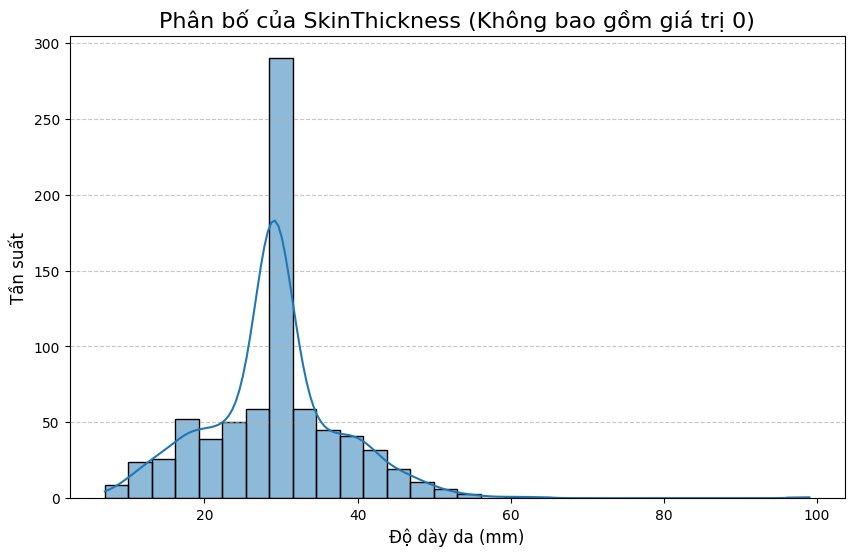

In [26]:
# @title
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0 để phân tích phân bố rõ hơn
sns.histplot(df1['SkinThickness'], kde=True, bins=30)
plt.title('Phân bố của SkinThickness (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Độ dày da (mm)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*  Giá trị trung bình, trung vị, min–max của SkinThickness là bao nhiêu?

Trung bình (mean): khoảng 30 mm

Trung vị (median): khoảng 29–30 mm

Min – Max: từ 0 mm (giá trị bất thường) đến gần 100 mm

In [27]:
# @title
skin_thickness_stats = df1['SkinThickness'].describe()
print(f"\n- Giá trị trung bình của SkinThickness (không bao gồm 0): {skin_thickness_stats['mean']:.2f}")
print(f"- Giá trị trung vị của SkinThickness (không bao gồm 0): {skin_thickness_stats.median():.2f}")
print(f"- Giá trị Min của SkinThickness (tất cả dữ liệu): {skin_thickness_stats['min']:.2f}")
print(f"- Giá trị Max của SkinThickness (tất cả dữ liệu): {skin_thickness_stats['max']:.2f}")


- Giá trị trung bình của SkinThickness (không bao gồm 0): 29.11
- Giá trị trung vị của SkinThickness (không bao gồm 0): 29.05
- Giá trị Min của SkinThickness (tất cả dữ liệu): 7.00
- Giá trị Max của SkinThickness (tất cả dữ liệu): 99.00


* Phân phối SkinThickness có chuẩn (normal distribution) không?

Không chuẩn:

Biểu đồ lệch phải (right-skewed).

Có “đỉnh” tập trung quanh 29–30 mm.

Ngoài ra, có một số giá trị ngoại lai (outlier) ở mức cao > 70 mm.

In [28]:
# @title
from scipy.stats import shapiro

# Thực hiện kiểm định Shapiro-Wilk
stat, p_value = shapiro(skin_thickness_stats)

print(f"\n- Thống kê kiểm định Shapiro-Wilk: {stat:.4f}")
print(f"- Giá trị p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n> Kết luận: Phân phối SkinThickness KHÔNG phải là phân phối chuẩn.")
else:
    print("\nKết luận: Phân phối SkinThickness có thể là phân phối chuẩn.")


- Thống kê kiểm định Shapiro-Wilk: 0.5021
- Giá trị p-value: 0.0000

> Kết luận: Phân phối SkinThickness KHÔNG phải là phân phối chuẩn.


*   Nhóm độ dày da nào phổ biến nhất (ví dụ chia bins: thấp, trung bình, cao)?

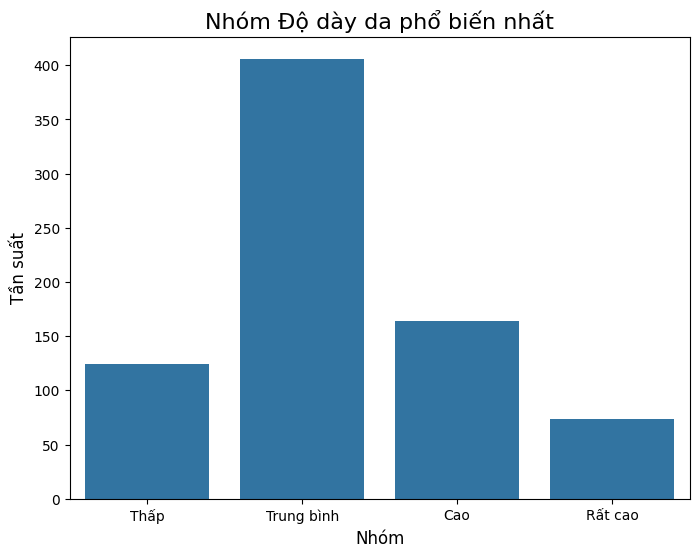

Tần suất phân bố theo nhóm độ dày da:
 SkinThickness_Category
Trung bình    406
Cao           164
Thấp          124
Rất cao        74
Name: count, dtype: int64

Nhóm độ dày da phổ biến nhất là: Trung bình


In [29]:
# Tạo các bins dựa trên các phân vị hoặc giá trị bạn tự định nghĩa
bins = [0, 20, 30, 40, df1['SkinThickness'].max()]
labels = ['Thấp', 'Trung bình', 'Cao', 'Rất cao']

# Phân loại dữ liệu vào các bins
df1['SkinThickness_Category'] = pd.cut(df1['SkinThickness'], bins=bins, labels=labels, include_lowest=True)


# Đếm tần suất của mỗi nhóm
skin_thickness_category_counts = df1['SkinThickness_Category'].value_counts()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=skin_thickness_category_counts.index, y=skin_thickness_category_counts.values)
plt.title('Nhóm Độ dày da phổ biến nhất', fontsize=16)
plt.xlabel('Nhóm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()

print("Tần suất phân bố theo nhóm độ dày da:\n", skin_thickness_category_counts)

# Xác định nhóm phổ biến nhất
most_common_skin_thickness_group = skin_thickness_category_counts.idxmax()
print(f"\nNhóm độ dày da phổ biến nhất là: {most_common_skin_thickness_group}")

Nhóm Trung bình (20-35 mm) là phổ biến nhất (hơn 400 người).

#### 2. Phân bố của Insulin:

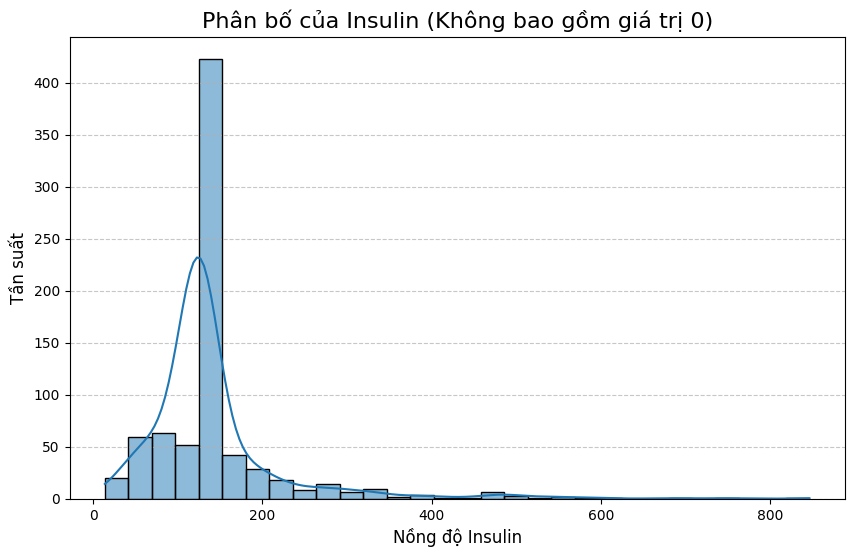

Nồng độ insulin trung bình là: 140.67


In [30]:
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0
sns.histplot(df1[df1['Insulin'] != 0]['Insulin'], kde=True, bins=30)
plt.title('Phân bố của Insulin (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Nồng độ Insulin', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Nồng độ insulin trung bình
insulin_mean = df1['Insulin'].mean()
print(f"Nồng độ insulin trung bình là: {insulin_mean:.2f}")

#### 3. Phân bố của BloodPressure:

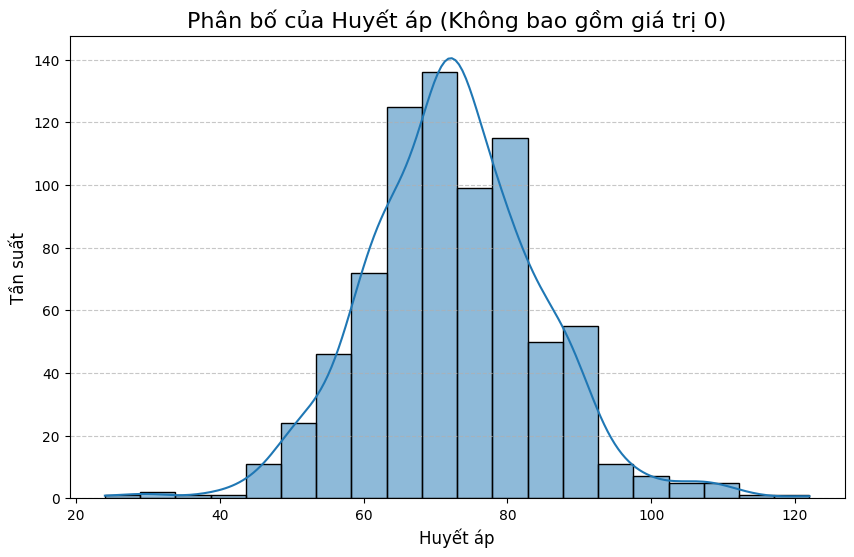

BloodPressure trung bình là: 72.39


In [31]:
plt.figure(figsize=(10, 6))
# Lọc các giá trị khác 0 để phân tích phân bố rõ hơn
sns.histplot(df1[df1['BloodPressure'] != 0]['BloodPressure'], kde=True, bins=20)
plt.title('Phân bố của Huyết áp (Không bao gồm giá trị 0)', fontsize=16)
plt.xlabel('Huyết áp', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# BloodPressure trung bình
blood_pressure_mean = df1['BloodPressure'].mean()
print(f"BloodPressure trung bình là: {blood_pressure_mean:.2f}")

### Q2. phân tích nhị biến sự tương quan giữa các yếu tố với outcome


#### 1. Tỷ lệ mắc tiểu đường thay đổi thế nào theo nhóm SkinThickness:

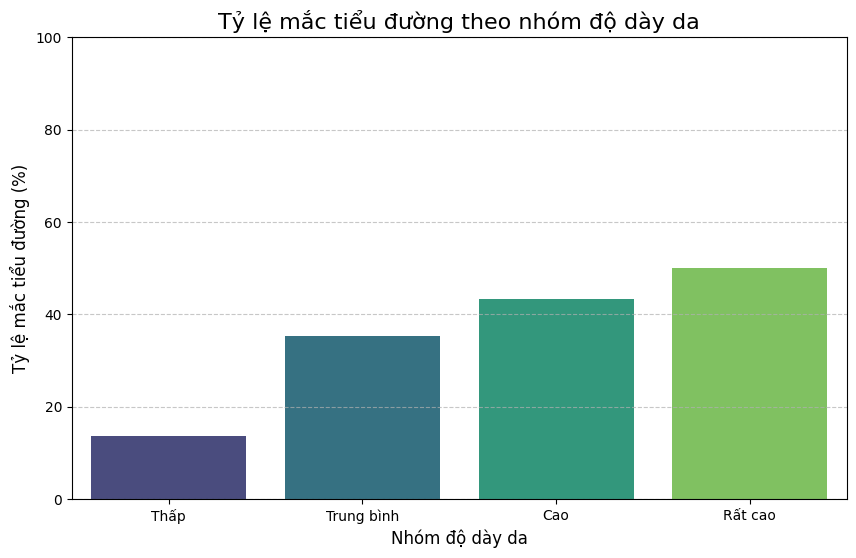

Tỷ lệ mắc tiểu đường theo nhóm độ dày da:
   SkinThickness_Category    Outcome
0                   Thấp  13.709677
1             Trung bình  35.221675
2                    Cao  43.292683
3                Rất cao  50.000000


In [41]:
# Tính tỷ lệ mắc tiểu đường theo từng nhóm SkinThickness
skin_thickness_diabetes_rate = df1.groupby('SkinThickness_Category', observed=False)['Outcome'].mean().reset_index()
skin_thickness_diabetes_rate['Outcome'] = skin_thickness_diabetes_rate['Outcome'] * 100 # Chuyển đổi sang phần trăm

# Trực quan hóa kết quả bằng biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='SkinThickness_Category', y='Outcome', data=skin_thickness_diabetes_rate, hue='SkinThickness_Category', palette='viridis', legend=False)
plt.title('Tỷ lệ mắc tiểu đường theo nhóm độ dày da', fontsize=16)
plt.xlabel('Nhóm độ dày da', fontsize=12)
plt.ylabel('Tỷ lệ mắc tiểu đường (%)', fontsize=12)
plt.ylim(0, 100) # Đặt giới hạn trục y từ 0 đến 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Tỷ lệ mắc tiểu đường theo nhóm độ dày da:\n", skin_thickness_diabetes_rate)

nhìn vào biểu đồ trên ta có thể thấy mối quan hệ tương quan giữa độ dày da với outcome (tỉ lệ mắc tiểu đường): các nhóm da có độ dày thấp (ví dụ như nhóm skinThickness: thấp chỉ có ~14%) thường có tỉ lệ mắc bệnh tiểu đường thấp hơn so với các nhóm có độ dày da cao hơn (như là nhóm da có độ dày rất cao có tỉ lệ mắc bệnh tiểu đường là ~50%)

#### 2. Huyết áp trung bình của nhóm có tiểu đường và không tiểu đường khác nhau ra sao?

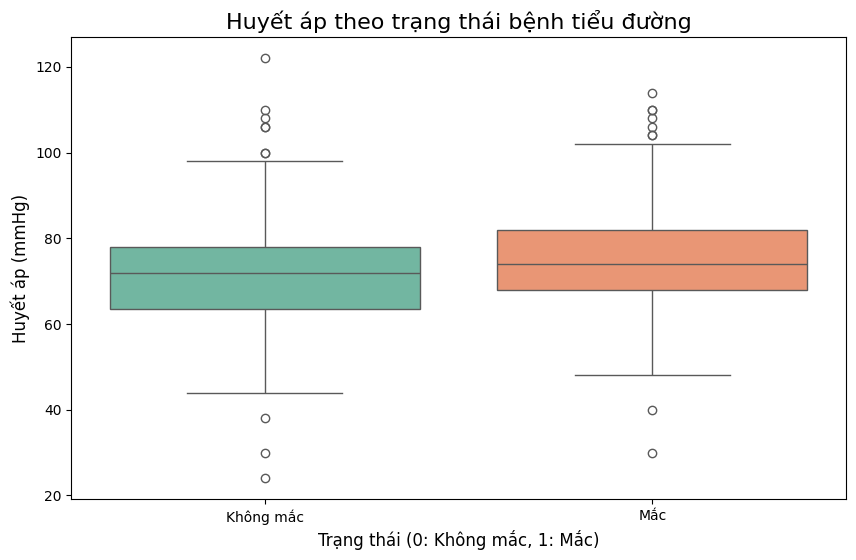

Huyết áp trung bình theo nhóm (0: Không tiểu đường, 1: Tiểu đường):
 Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64


In [42]:
blood_pressure_by_outcome = df1.groupby('Outcome')['BloodPressure'].mean()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df1, hue='Outcome', palette='Set2', legend=False)
plt.title('Huyết áp theo trạng thái bệnh tiểu đường', fontsize=16)
plt.xlabel('Trạng thái (0: Không mắc, 1: Mắc)', fontsize=12)
plt.ylabel('Huyết áp (mmHg)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

# So sánh huyết áp trung bình giữa hai nhóm
print("Huyết áp trung bình theo nhóm (0: Không tiểu đường, 1: Tiểu đường):\n", blood_pressure_by_outcome)

qua biểu đồ trên ta có thể thấy được huyết áp trung bình của nhóm mắc tiểu đường là cao hơn so với nhóm không mắc

#### 3. Có mối quan hệ tuyến tính giữa mức Insulin và khả năng mắc bệnh không?

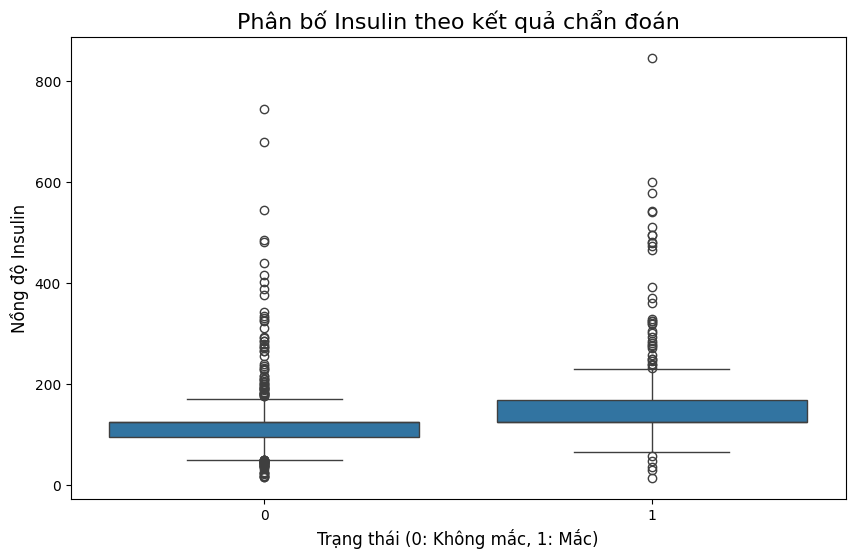

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df1)
plt.title('Phân bố Insulin theo kết quả chẩn đoán', fontsize=16)
plt.xlabel('Trạng thái (0: Không mắc, 1: Mắc)', fontsize=12)
plt.ylabel('Nồng độ Insulin', fontsize=12)
plt.show()

nhìn vào biểu đồ trên, ta có thể thấy được người mắc bệnh thường có nồng độ isulin cao

### Q3. phân tích đa biến sự tương quan giữa các yếu tố

#### 1. Sự kết hợp Insulin + Glucose + BloodPressure có dự đoán tốt khả năng mắc tiểu đường không?

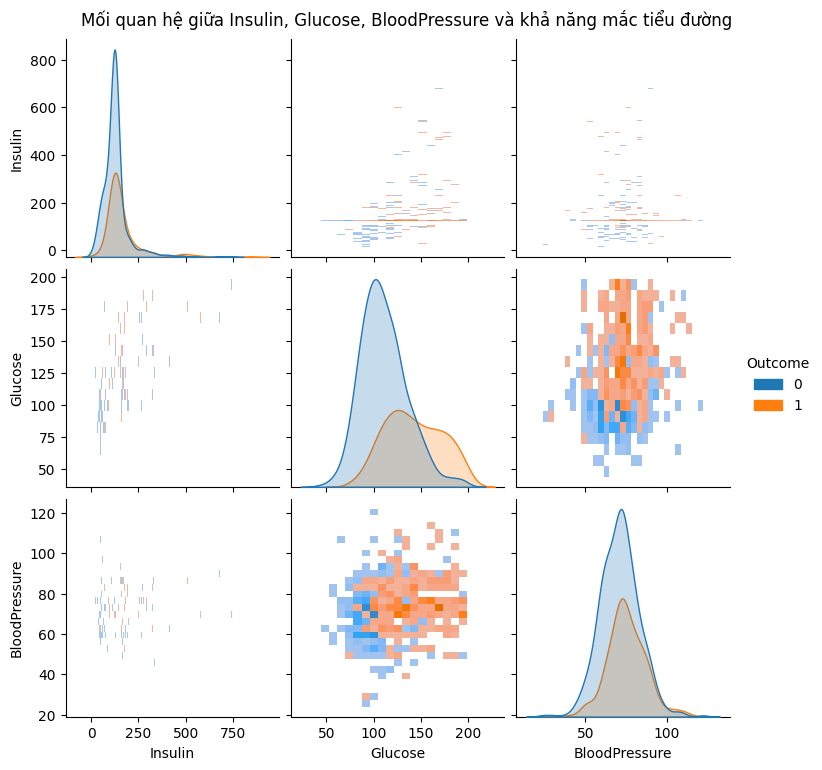

In [46]:
sns.pairplot(df1, vars=['Insulin', 'Glucose', 'BloodPressure'], hue='Outcome', kind='hist', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa Insulin, Glucose, BloodPressure và khả năng mắc tiểu đường', y=1.02)
plt.show()

dựa vào biểu đồ ta thấy nếu chỉ xét 3 biến này, khả năng dự báo tiểu đường sẽ có độ chính xác ở mức trung bình, chủ yếu nhờ biến Glucose.

Để tăng độ tin cậy, cần kết hợp thêm các yếu tố khác như BMI, Age, DiabetesPedigreeFunction - vốn được chứng minh có liên hệ mạnh với nguy cơ mắc tiểu đường.

#### 2. Bệnh nhân BMI cao và Insulin cao có xác suất mắc bệnh vượt trội không?

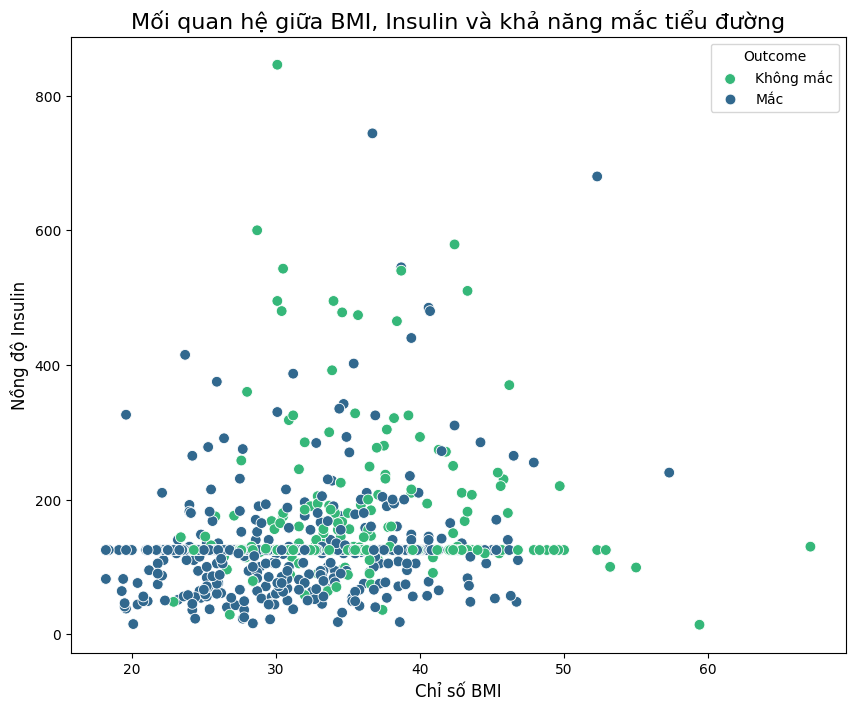

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BMI', y='Insulin', hue='Outcome', data=df1, s=60, palette='viridis')
plt.title('Mối quan hệ giữa BMI, Insulin và khả năng mắc tiểu đường', fontsize=16)
plt.xlabel('Chỉ số BMI', fontsize=12)
plt.ylabel('Nồng độ Insulin', fontsize=12)
plt.legend(title='Outcome', labels=['Không mắc', 'Mắc'])
plt.show()

qua biểu đồ trên ta có thể thấy được BMI cao rõ ràng là một yếu tố nguy cơ mạnh cho khả năng mắc tiểu đường.

Insulin cao có thể làm tăng nguy cơ, đặc biệt khi đi kèm với BMI cao, nhưng không phải yếu tố quyết định.

Do đó, nhóm BMI cao + Insulin cao nhìn chung có xác suất mắc tiểu đường vượt trội so với nhóm còn lại, nhưng không hoàn toàn tuyệt đối. Để dự đoán chắc chắn hơn, cần bổ sung thêm các biến quan trọng khác như Glucose, Age, DiabetesPedigreeFunction.

## **Phân tích kết quả chẩn đoán (Outcome Analysis)**

### 1. Tỷ lệ bệnh nhân theo kết quả chẩn đoán

Tỷ lệ bệnh nhân theo Outcome:
Không mắc bệnh (Outcome = 0): 65.10%
Mắc bệnh (Outcome = 1): 34.90%


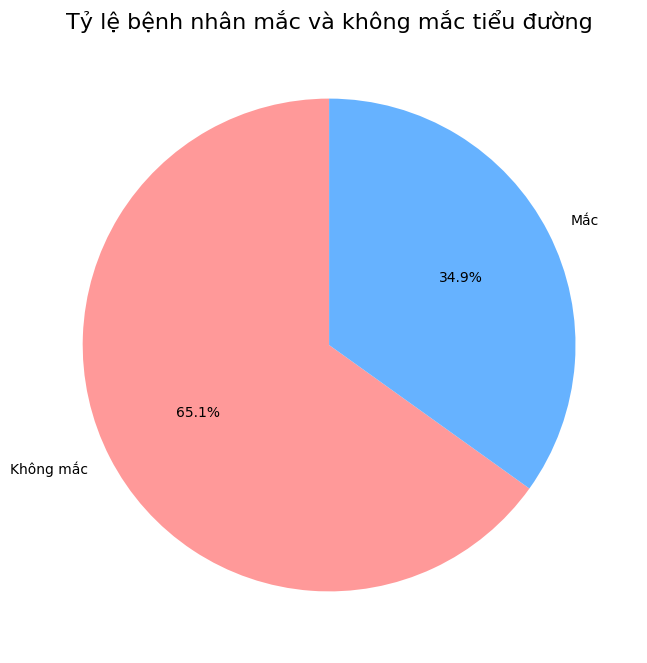

In [49]:
# @title
# Tính tỷ lệ
outcome_counts = df1['Outcome'].value_counts()
outcome_percentages = outcome_counts / len(df1) * 100

print("Tỷ lệ bệnh nhân theo Outcome:")
print(f"Không mắc bệnh (Outcome = 0): {outcome_percentages[0]:.2f}%")
print(f"Mắc bệnh (Outcome = 1): {outcome_percentages[1]:.2f}%")

# Trực quan hóa bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(outcome_percentages, labels=['Không mắc', 'Mắc'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Tỷ lệ bệnh nhân mắc và không mắc tiểu đường', fontsize=16)
plt.show()

Dựa trên biểu đồ:

*   Tỉ lệ bệnh nhân không mắc tiểu đường (Outcome = 0): 65.1%

*   Tỉ lệ bệnh nhân mắc tiểu đường (Outcome = 1): 34.9%

Nghĩa là trong dữ liệu này, khoảng 2/3 số bệnh nhân không mắc bệnh, và 1/3 có chẩn đoán mắc bệnh tiểu đường.

### 2. So sánh Glucose và DiabetesPedigreeFunction giữa hai nhóm

#### Mức glucose trung bình theo nhóm

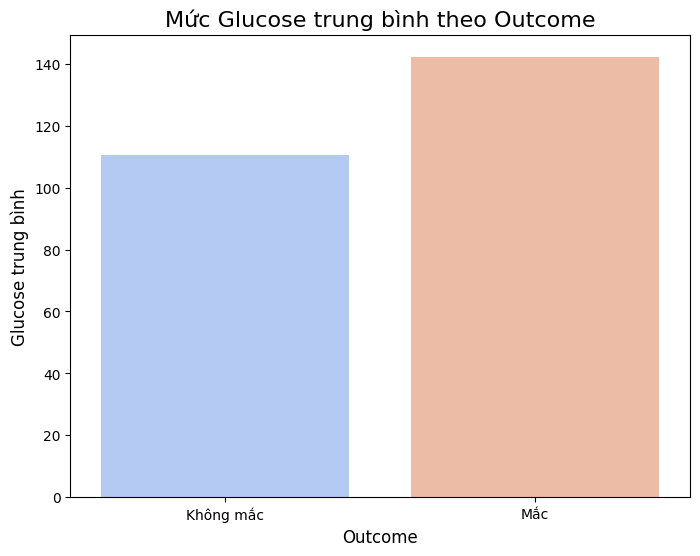

Mức Glucose trung bình theo nhóm:
    Outcome     Glucose
0        0  110.682000
1        1  142.130597


In [54]:
# Tính giá trị trung bình của Glucose theo Outcome
glucose_by_outcome = df1.groupby('Outcome')['Glucose'].mean().reset_index()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=glucose_by_outcome, palette='coolwarm', hue='Outcome', legend=False)
plt.title('Mức Glucose trung bình theo Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Glucose trung bình', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

print("Mức Glucose trung bình theo nhóm:\n", glucose_by_outcome)

Nhìn vào biểu đồ trên, ta thấy:

* Nhóm không mắc tiểu đường: Glucose trung bình khoảng 110 mg/dL.

* Nhóm mắc tiểu đường: Glucose trung bình cao hơn rõ rệt, khoảng 142 mg/dL.

Điều này phản ánh đúng cơ sở y học: đường huyết cao là chỉ số quan trọng nhất trong việc chẩn đoán tiểu đường. Người mắc bệnh thường có Glucose trung bình cao hơn đáng kể so với người không mắc.

#### Chỉ số DiabetesPedigreeFunction theo Outcome

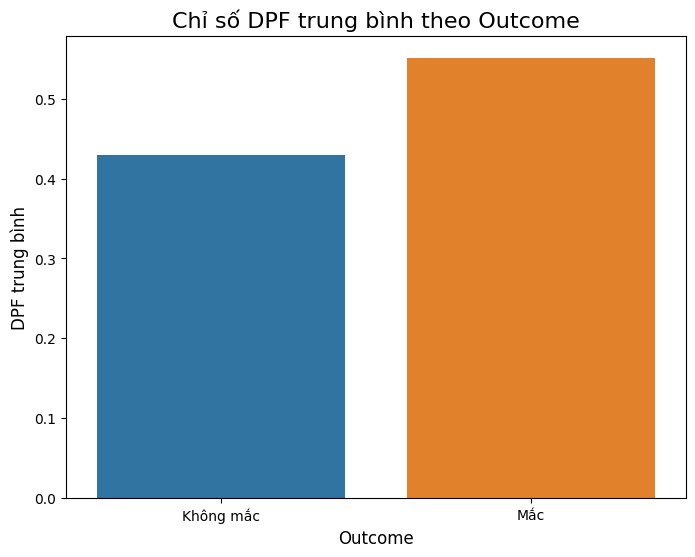


Chỉ số DiabetesPedigreeFunction trung bình theo nhóm:
    Outcome  DiabetesPedigreeFunction
0        0                  0.429734
1        1                  0.550500


In [55]:
# Tính giá trị trung bình của DPF theo Outcome
dpf_by_outcome = df1.groupby('Outcome')['DiabetesPedigreeFunction'].mean().reset_index()

# Trực quan hóa bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction', data=dpf_by_outcome, palette='tab10', hue='Outcome', legend=False)
plt.title('Chỉ số DPF trung bình theo Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('DPF trung bình', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không mắc', 'Mắc'])
plt.show()

print("\nChỉ số DiabetesPedigreeFunction trung bình theo nhóm:\n", dpf_by_outcome)

Nhìn biểu đồ, ta thấy:

* Nhóm không mắc: DPF trung bình khoảng 0.43.

* Nhóm mắc: DPF trung bình cao hơn, khoảng 0.55.

DPF đo lường yếu tố di truyền/nguy cơ gia đình. Sự khác biệt này cho thấy những người có tiền sử gia đình hoặc yếu tố di truyền liên quan đến tiểu đường có xác suất mắc bệnh cao hơn.

### 3. Yếu tố ảnh hưởng mạnh nhất đến nguy cơ mắc bệnh giữa tuổi, BMI, Glucose

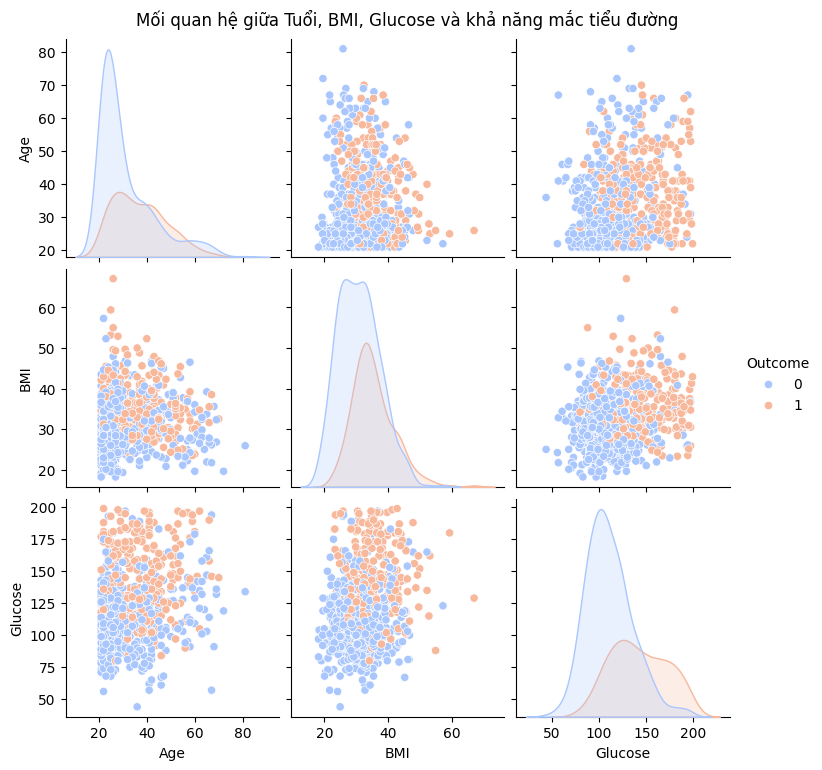

In [56]:
# Biểu đồ cặp để phân tích đa biến
sns.pairplot(df1, vars=['Age', 'BMI', 'Glucose'], hue='Outcome', palette='coolwarm', diag_kind='kde')
plt.suptitle('Mối quan hệ giữa Tuổi, BMI, Glucose và khả năng mắc tiểu đường', y=1.02)
plt.show()

* Glucose là yếu tố ảnh hưởng mạnh nhất đến khả năng mắc tiểu đường.

* BMI có vai trò trung bình, bổ trợ khi kết hợp với Glucose.

* Tuổi có ảnh hưởng yếu hơn, nhưng có thể làm tăng rủi ro ở nhóm lớn tuổi.

Nói cách khác, Glucose > BMI > Age về mức độ dự báo tiểu đường trong dữ liệu này.